In [1]:
install.packages("igraph")
library('igraph')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [6]:
library(RColorBrewer)

In [44]:
install.packages("clevr")
library(clevr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘BH’




In [2]:
unzip("finance_data.zip")

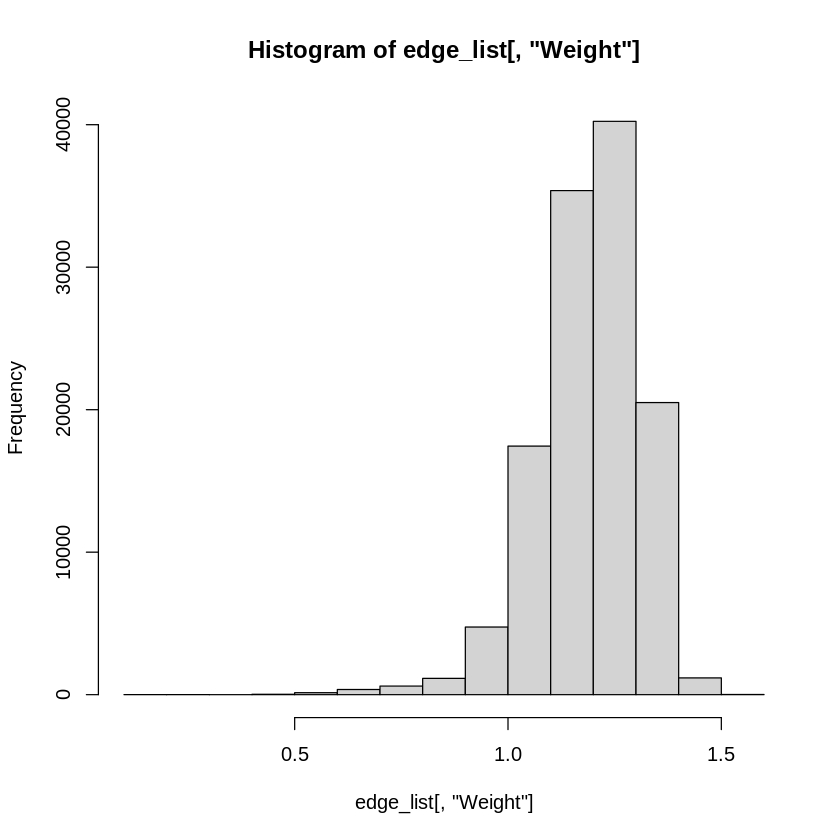

In [27]:
# Question 2
graph_df <- data.frame(matrix(ncol = 3, nrow = 0))
colnames(graph_df) <- c("Source", "Sink", "Weight")

name_sector <- read.csv(file = 'finance_data/Name_sector.csv', header = TRUE)
stock_data_files = paste("finance_data/data", sort(list.files("finance_data/data")), sep = "/")
log_norm_return = matrix(0, length(stock_data_files), 764)
counter <- 1
remove_indicies <- c()
for(j in c(1:length(stock_data_files))){
    df <- read.csv(stock_data_files[j], header=TRUE)
    if (dim(df)[1] == 765) {
        p <- df[,5] 
        q <- c()
        for(t in c(2:length(p))){
            q[t-1] <- (p[t]-p[t-1])/p[t-1]
        }
        log_norm_return[counter,] <- log(1+q)
        counter <- counter+1
    } else {
      remove_indicies <- c(remove_indicies, j)
    }
}
log_norm_return <- log_norm_return[rowSums(log_norm_return[,-1]) != 0,]
name_sector <- name_sector[-remove_indicies,]

for(i in c(1:(dim(log_norm_return)[1]-1))){
    for(j in c((i+1):dim(log_norm_return)[1])){
    
      ri <- mean(log_norm_return[i,]) 
      rj <- mean(log_norm_return[j,])
      rhoij <- ((mean(log_norm_return[i,]*log_norm_return[j,]))-(ri*rj))/(sqrt((mean(log_norm_return[i,]^2)-(ri^2))*(mean(log_norm_return[j,]^2)-(rj^2))))
      wij <- sqrt(2*(1-rhoij))
      graph_df[nrow(graph_df) + 1,] <- c(name_sector[i,1], name_sector[j,1], wij)
    }
}
graph_df <- subset(graph_df, Source!=Sink)
correlation_graph <- graph.data.frame(d=graph_df, directed = FALSE)
E(correlation_graph)$weight <- edge_list[,"Weight"]
hist(edge_list[,"Weight"])

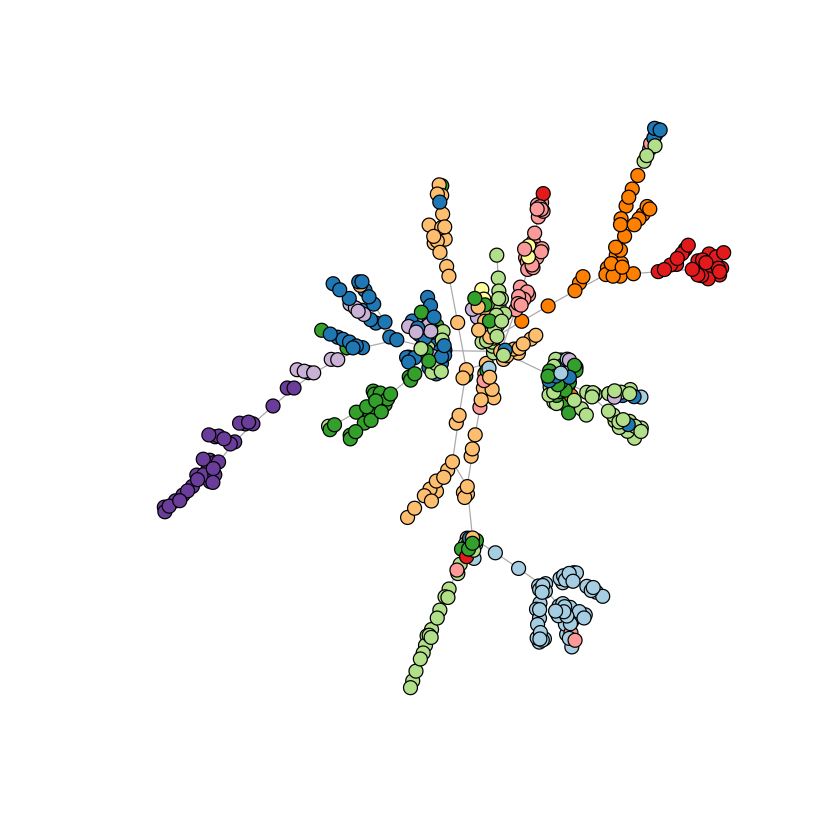

In [28]:
# Question 3
mst <- mst(correlation_graph, algorithm="prim")
sectors <- data.frame(Country = unique(name_sector[,2]), stringsAsFactors = F)
color_palette <- brewer.pal(n = 11, name = "Paired")


colors <- c()
for(v in c(1:vcount(mst))){
    colors[v] <- color_palette[which(sectors==name_sector[v,2])]
}

plot(mst,vertex.size=5, vertex.label="", vertex.color=colors)

[1] 0.6826446

[1] 0.4792845

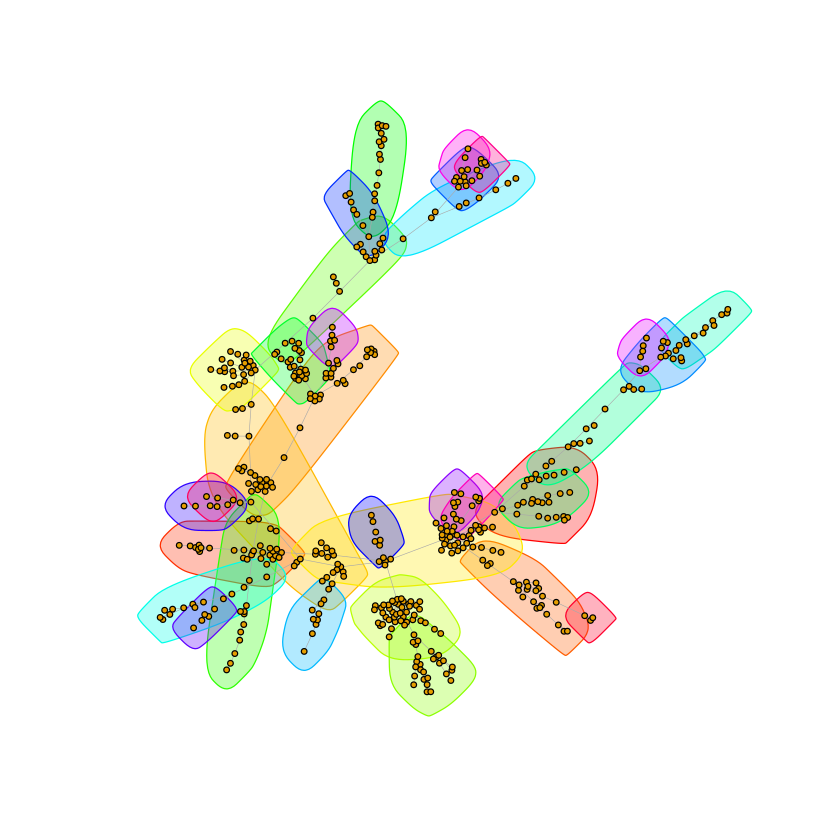

In [50]:
#Question 4
cluster <- cluster_walktrap(mst)
plot(mst, mark.groups=cluster,edge.width=0.5, vertex.size=2, vertex.label="")
homogeneity(name_sector[,2], cluster$membership)
completeness(name_sector[,2], cluster$membership)

In [208]:
# Question 5
Si <- c()
for(i in c(1:length(sectors[,1]))){
  Si[i] <- length(which(name_sector[,2]==sectors[i,]))
}
p1 <- c()
p2 <- c()
verticies <- vcount(mst)
for(v in c(1:verticies)){
  neighbors <- neighbors(mst, v)
  Qi <- 0
  for(i in neighbors){
    if(name_sector[i,2] == name_sector[v,2])
      Qi <- Qi+1
  }
  p1[v] <- Qi/length(neighbors)
  p2[v] <- Si[which(sectors[,1]==name_sector[v,2])]/verticies
}
alpha1 <- sum(p1)/verticies
alpha2 <- sum(p2)/verticies
cat(alpha1, alpha2)

0.8289301 0.1141881

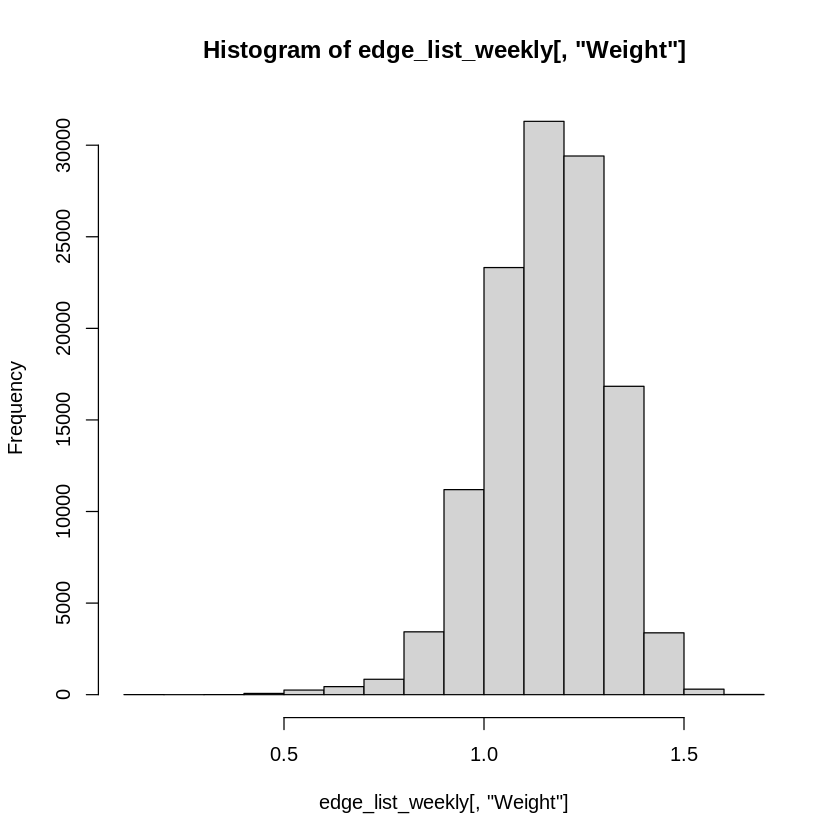

In [4]:
# Question 6
graph_df_weekly <- data.frame(matrix(ncol = 3, nrow = 0))
colnames(graph_df_weekly) <- c("Source", "Sink", "Weight")

name_sector_weekly <- read.csv(file = 'finance_data/Name_sector.csv', header = TRUE)
stock_data_files = paste("finance_data/data", sort(list.files("finance_data/data")), sep = "/")
log_norm_return_weekly = matrix(0, length(stock_data_files), 142)
counter <- 1
remove_indicies <- c()
for(j in c(1:length(stock_data_files))){
    df <- read.csv(stock_data_files[j], header=TRUE)
    df["Day"] <- weekdays(as.Date(df[,1])) 
    df <- subset(df, Day=="Monday")
    if (dim(df)[1] == 143) {
        p <- df[,5] 
        q <- c()
        for(t in c(2:length(p))){
            q[t-1] <- (p[t]-p[t-1])/p[t-1]
        }
        log_norm_return_weekly[counter,] <- log(1+q)
        counter <- counter+1
    } else {
      remove_indicies <- c(remove_indicies, j)
    }
}
log_norm_return_weekly <- log_norm_return_weekly[rowSums(log_norm_return_weekly[,-1]) != 0,]
name_sector_weekly <- name_sector_weekly[-remove_indicies,]

for(i in c(1:(dim(log_norm_return_weekly)[1]-1))){
    for(j in c((i+1):dim(log_norm_return_weekly)[1])){
    
      ri <- mean(log_norm_return_weekly[i,]) 
      rj <- mean(log_norm_return_weekly[j,])
      rhoij <- ((mean(log_norm_return_weekly[i,]*log_norm_return_weekly[j,]))-(ri*rj))/(sqrt((mean(log_norm_return_weekly[i,]^2)-(ri^2))*(mean(log_norm_return_weekly[j,]^2)-(rj^2))))
      wij <- sqrt(2*(1-rhoij))
      graph_df_weekly[nrow(graph_df_weekly) + 1,] <- c(name_sector_weekly[i,1], name_sector_weekly[j,1], wij)
    }
}
graph_df_weekly <- subset(graph_df_weekly, Source!=Sink)
correlation_graph_weekly <- graph.data.frame(d=graph_df_weekly, directed = FALSE)
E(correlation_graph_weekly)$weight = edge_list_weekly[,"Weight"]
hist(edge_list_weekly[,"Weight"])

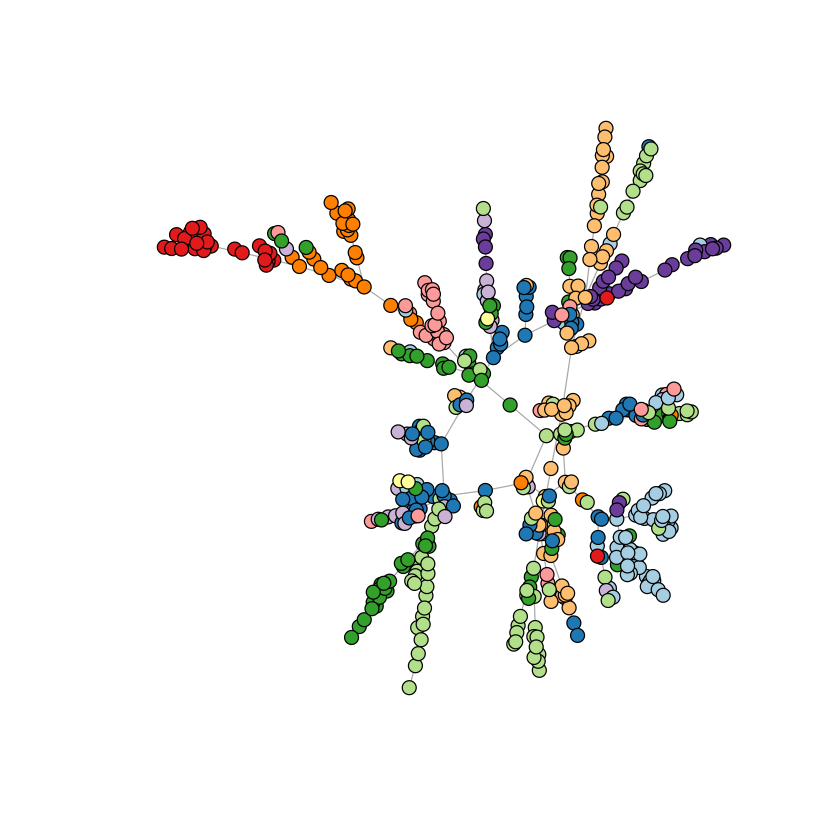

In [11]:
mst_weekly <- mst(correlation_graph_weekly, algorithm="prim")
sectors_weekly <- data.frame(Country = unique(name_sector_weekly[,2]), stringsAsFactors = F)
color_palette <- brewer.pal(n = 11, name = "Paired")


colors_weekly <- c()
for(v in c(1:vcount(mst_weekly))){
    colors_weekly[v] <- color_palette[which(sectors_weekly==name_sector_weekly[v,2])]
}

plot(mst_weekly,vertex.size=5, vertex.label="", vertex.color=colors_weekly)

[1] 0.5811237

[1] 0.3900435

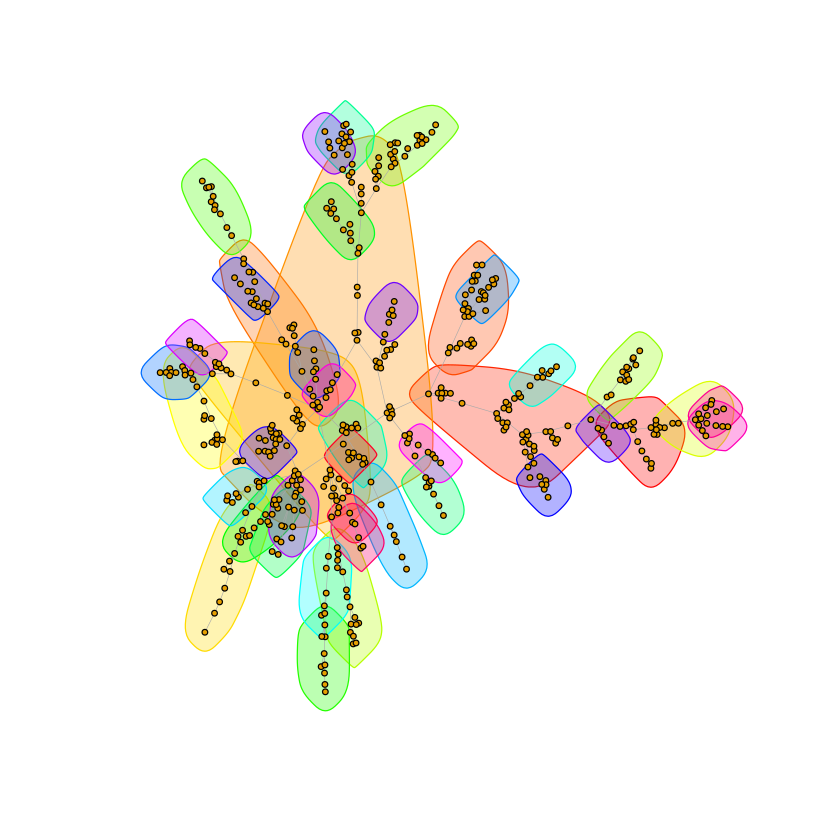

In [51]:
cluster_weekly <- cluster_walktrap(mst_weekly)
plot(mst_weekly, mark.groups=cluster_weekly,edge.width=0.5, vertex.size=2, vertex.label="")
homogeneity(name_sector_weekly[,2], cluster_weekly$membership)
completeness(name_sector_weekly[,2], cluster_weekly$membership)


In [54]:
Si_weekly <- c()
for(i in c(1:length(sectors_weekly[,1]))){
  Si_weekly[i] <- length(which(name_sector_weekly[,2]==sectors_weekly[i,]))
}
p1_weekly <- c()
p2_weekly <- c()
verticies_weekly <- vcount(mst_weekly)
for(v in c(1:verticies_weekly)){
  neighbors <- neighbors(mst_weekly, v)
  Qi <- 0
  for(i in neighbors){
    if(name_sector_weekly[i,2] == name_sector_weekly[v,2])
      Qi <- Qi+1
  }
  p1_weekly[v] <- Qi/length(neighbors)
  p2_weekly[v] <- Si_weekly[which(sectors_weekly[,1]==name_sector_weekly[v,2])]/verticies_weekly
}
alpha1_weekly <- sum(p1_weekly)/verticies_weekly
alpha2_weekly <- sum(p2_weekly)/verticies_weekly
cat(alpha1_weekly, alpha2_weekly)

0.7439573 0.1143086

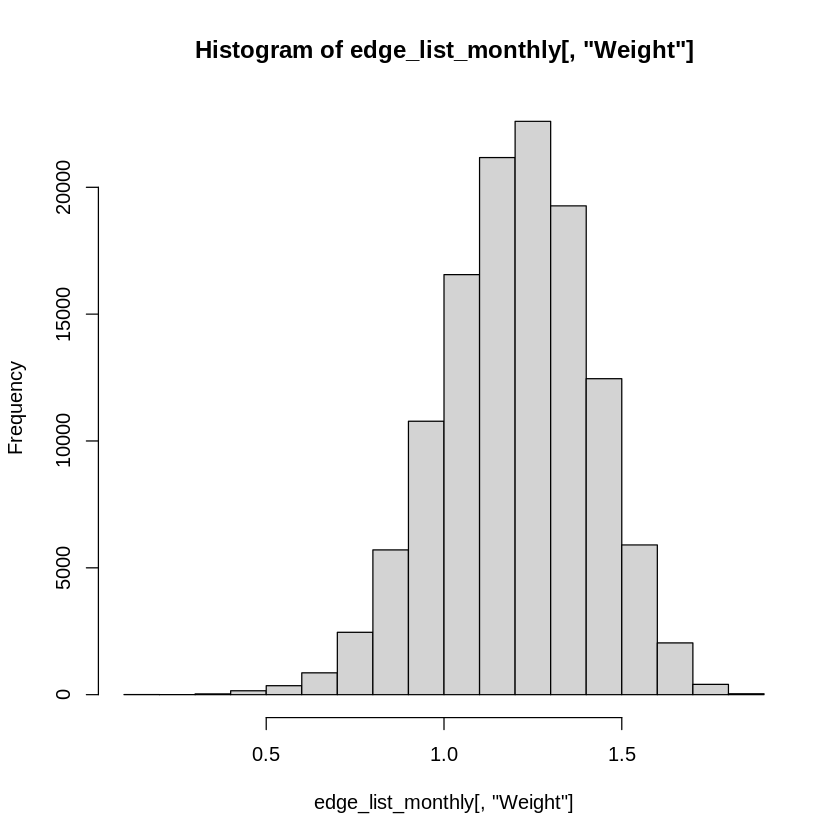

In [24]:
# Question 7
graph_df_monthly <- data.frame(matrix(ncol = 3, nrow = 0))
colnames(graph_df_monthly) <- c("Source", "Sink", "Weight")

name_sector_monthly <- read.csv(file = 'finance_data/Name_sector.csv', header = TRUE)
stock_data_files = paste("finance_data/data", sort(list.files("finance_data/data")), sep = "/")
log_norm_return_monthly = matrix(0, length(stock_data_files), 24)
counter <- 1
remove_indicies <- c()
for(j in c(1:length(stock_data_files))){
    df <- read.csv(stock_data_files[j], header=TRUE)
    df["date"] <- format(as.Date(df[,1]), "%d")
    df <- subset(df, date==15)
    if (dim(df)[1] == 25) {
        p <- df[,5] 
        q <- c()
        for(t in c(2:length(p))){
            q[t-1] <- (p[t]-p[t-1])/p[t-1]
        }
        log_norm_return_monthly[counter,] <- log(1+q)
        counter <- counter+1
    } else {
      remove_indicies <- c(remove_indicies, j)
    }
}
log_norm_return_monthly <- log_norm_return_monthly[rowSums(log_norm_return_monthly[,-1]) != 0,]
name_sector_monthly <- name_sector_monthly[-remove_indicies,]

for(i in c(1:(dim(log_norm_return_monthly)[1]-1))){
    for(j in c((i+1):dim(log_norm_return_monthly)[1])){
    
      ri <- mean(log_norm_return_monthly[i,]) 
      rj <- mean(log_norm_return_monthly[j,])
      rhoij <- ((mean(log_norm_return_monthly[i,]*log_norm_return_monthly[j,]))-(ri*rj))/(sqrt((mean(log_norm_return_monthly[i,]^2)-(ri^2))*(mean(log_norm_return_monthly[j,]^2)-(rj^2))))
      wij <- sqrt(2*(1-rhoij))
      graph_df_monthly[nrow(graph_df_monthly) + 1,] <- c(name_sector_monthly[i,1], name_sector_monthly[j,1], wij)
    }
}
graph_df_monthly <- subset(graph_df_monthly, Source!=Sink)
correlation_graph_monthly <- graph.data.frame(d=graph_df_monthly, directed = FALSE)
E(correlation_graph_monthly)$weight = edge_list_monthly[,"Weight"]
hist(edge_list_monthly[,"Weight"])

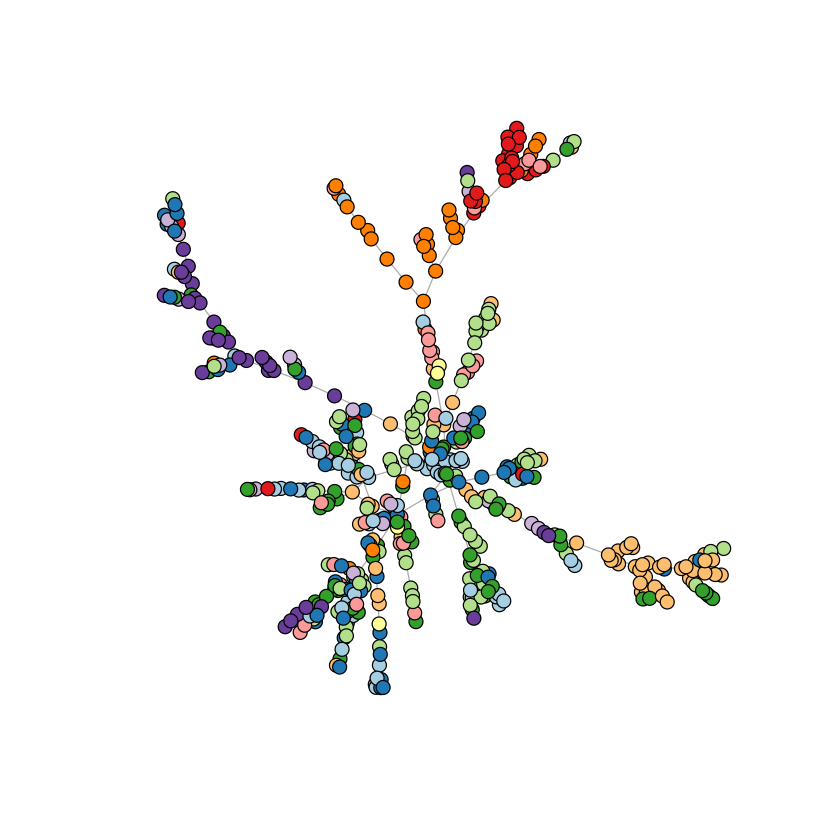

In [25]:
mst_monthly <- mst(correlation_graph_monthly, algorithm="prim")
sectors_monthly <- data.frame(Country = unique(name_sector_monthly[,2]), stringsAsFactors = F)
color_palette <- brewer.pal(n = 11, name = "Paired")


colors_monthly <- c()
for(v in c(1:vcount(mst_monthly))){
    colors_monthly[v] <- color_palette[which(sectors_monthly==name_sector_monthly[v,2])]
}

plot(mst_monthly,vertex.size=5, vertex.label="", vertex.color=colors_monthly)

[1] 0.4794473

[1] 0.2775512

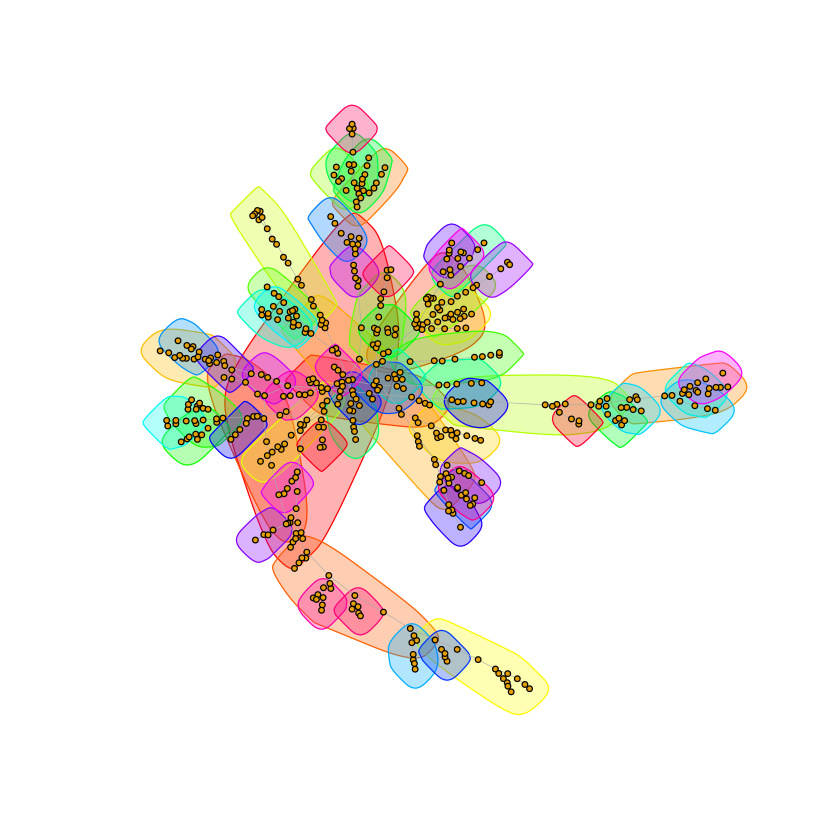

In [52]:
cluster_monthly <- cluster_walktrap(mst_monthly)
plot(mst_monthly, mark.groups=cluster_monthly,edge.width=0.5, vertex.size=2, vertex.label="")
homogeneity(name_sector_monthly[,2], cluster_monthly$membership)
completeness(name_sector_monthly[,2], cluster_monthly$membership)


In [53]:
Si_monthly <- c()
for(i in c(1:length(sectors_monthly[,1]))){
  Si_monthly[i] <- length(which(name_sector_monthly[,2]==sectors_monthly[i,]))
}
p1_monthly <- c()
p2_monthly <- c()
verticies_monthly <- vcount(mst_monthly)
for(v in c(1:verticies_monthly)){
  neighbors <- neighbors(mst_monthly, v)
  Qi <- 0
  for(i in neighbors){
    if(name_sector_monthly[i,2] == name_sector_monthly[v,2])
      Qi <- Qi+1
  }
  p1_monthly[v] <- Qi/length(neighbors)
  p2_monthly[v] <- Si_monthly[which(sectors_monthly[,1]==name_sector_monthly[v,2])]/verticies_monthly
}
alpha1_monthly <- sum(p1_monthly)/verticies_monthly
alpha2_monthly <- sum(p2_monthly)/verticies_monthly
cat(alpha1_monthly, alpha2_monthly)

0.4844464 0.1143086